<a href="https://colab.research.google.com/github/MichaelSeitz98/Seminararbeit/blob/main/Kopie_von_01_PA_Data_Science_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment: Data Science Basics

In this programming assignment you need to apply your new `numpy`, `pandas` and `matplotlib` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)`s to solve the task. 

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

Pandas allows you to load the required data sets directly from github:

In [ ]:
# Load Data
transactions    = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/sales_train.csv.gz')
items           = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/items.csv')
item_categories = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/item_categories.csv')

## Get to know the data
Print the **shape** of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.

In [ ]:
print(transactions.shape)
transactions.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
print(item_categories.shape)
item_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


## Maximum total revenue among all the shops

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

What was the maximum total revenue among all the shops in July, 2013? 

* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 13` and `df.month == 6` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [ ]:
# Write your code here
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
transactions["date_converted"] = pd.to_datetime(transactions.date, format="%d.%m.%Y")
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [ ]:
date_range = pd.date_range(start="2013-07-01",end="2013-07-30")
selected_07_13_transactions = transactions[transactions['date_converted'].isin(date_range)]
selected_07_13_transactions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
631921,22.07.2013,6,28,51,249.0,1.0,2013-07-22
631922,27.07.2013,6,28,51,249.0,1.0,2013-07-27
631923,28.07.2013,6,28,59,249.0,1.0,2013-07-28
631924,01.07.2013,6,28,53,299.0,1.0,2013-07-01
631925,25.07.2013,6,28,45,299.0,1.0,2013-07-25
...,...,...,...,...,...,...,...
732464,25.07.2013,6,47,11868,0.1,1.0,2013-07-25
732465,27.07.2013,6,47,11868,0.1,2.0,2013-07-27
732466,30.07.2013,6,47,11738,199.0,1.0,2013-07-30
732467,30.07.2013,6,47,11740,199.0,1.0,2013-07-30


In [ ]:
# Now with additional column 'date_converted'
selected_07_13_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
631921,22.07.2013,6,28,51,249.0,1.0,2013-07-22
631922,27.07.2013,6,28,51,249.0,1.0,2013-07-27
631923,28.07.2013,6,28,59,249.0,1.0,2013-07-28
631924,01.07.2013,6,28,53,299.0,1.0,2013-07-01
631925,25.07.2013,6,28,45,299.0,1.0,2013-07-25


In [ ]:
selected_07_13_transactions_with_sales_volume = selected_07_13_transactions.copy()
selected_07_13_transactions_with_sales_volume.head(15)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
631921,22.07.2013,6,28,51,249.0,1.0,2013-07-22
631922,27.07.2013,6,28,51,249.0,1.0,2013-07-27
631923,28.07.2013,6,28,59,249.0,1.0,2013-07-28
631924,01.07.2013,6,28,53,299.0,1.0,2013-07-01
631925,25.07.2013,6,28,45,299.0,1.0,2013-07-25
631926,27.07.2013,6,28,40,249.0,1.0,2013-07-27
631927,01.07.2013,6,28,55,299.0,1.0,2013-07-01
631928,28.07.2013,6,28,55,249.0,1.0,2013-07-28
631929,22.07.2013,6,28,57,299.0,1.0,2013-07-22
631930,13.07.2013,6,27,22026,399.0,1.0,2013-07-13


In [ ]:
# Calculate volume of every transaction in July,13

selected_07_13_transactions_with_sales_volume['sales_volume'] = selected_07_13_transactions_with_sales_volume['item_price']*selected_07_13_transactions_with_sales_volume['item_cnt_day']
selected_07_13_transactions_with_sales_volume.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted,sales_volume
631921,22.07.2013,6,28,51,249.0,1.0,2013-07-22,249.0
631922,27.07.2013,6,28,51,249.0,1.0,2013-07-27,249.0
631923,28.07.2013,6,28,59,249.0,1.0,2013-07-28,249.0
631924,01.07.2013,6,28,53,299.0,1.0,2013-07-01,299.0
631925,25.07.2013,6,28,45,299.0,1.0,2013-07-25,299.0


In [ ]:
grouped_selected_07_13_transactions_with_sales_volume = selected_07_13_transactions_with_sales_volume.groupby(['shop_id'])

grouped_selected_07_13_transactions_with_sales_volume.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted,sales_volume
631921,22.07.2013,6,28,51,249.0,1.0,2013-07-22,249.0
631922,27.07.2013,6,28,51,249.0,1.0,2013-07-27,249.0
631923,28.07.2013,6,28,59,249.0,1.0,2013-07-28,249.0
631924,01.07.2013,6,28,53,299.0,1.0,2013-07-01,299.0
631925,25.07.2013,6,28,45,299.0,1.0,2013-07-25,299.0
...,...,...,...,...,...,...,...,...
731190,25.07.2013,6,47,4300,349.0,1.0,2013-07-25,349.0
731191,27.07.2013,6,47,4249,799.0,1.0,2013-07-27,799.0
731192,14.07.2013,6,47,4330,1198.0,1.0,2013-07-14,1198.0
731193,28.07.2013,6,47,4370,599.0,1.0,2013-07-28,599.0


In [ ]:
sum_of_each_shop  = grouped_selected_07_13_transactions_with_sales_volume['sales_volume'].sum()
sum_of_each_shop.head(20)

shop_id
2      851747.00
3      528441.50
4      956296.00
5      645159.00
6     2028614.00
7     1344578.99
10     368277.00
12     847137.95
13     215399.00
14     932832.00
15    1458986.00
16    1578617.00
17     561416.00
18    2254539.00
19    1423676.00
21     914448.65
22    1216136.99
24    1812312.00
25    3813980.30
26    1277129.10
Name: sales_volume, dtype: float64

In [ ]:
max_revenue = sum_of_each_shop.max()
print(f'Max Revenue in July 2013: € %.2f' % max_revenue)
 # Save the final value in this variable

Max Revenue in July 2013: € 4756260.75


In addition we can find the index (shop id) of the row with the max value in the column using ```idxmax()```

In [ ]:
# Write your code here

shop_id = sum_of_each_shop.idxmax()
print(f'Shop id with max revenue: {shop_id}')

Shop id with max revenue: 31


## Constant price

How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

* Let's assume, that the items are returned for the same price as they had been sold.

In [ ]:
# Write your code here

transactions.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10
6,02.01.2013,0,25,2565,549.00,1.0,2013-01-02
7,04.01.2013,0,25,2572,239.00,1.0,2013-01-04
8,11.01.2013,0,25,2572,299.00,1.0,2013-01-11
9,03.01.2013,0,25,2573,299.00,3.0,2013-01-03


In [ ]:
group_by_item_id = transactions['item_price'].groupby(transactions['item_id'])
group_by_item_id.head(10)

0           999.00
1           899.00
2           899.00
3          1709.05
4          1099.00
            ...   
2935810     250.00
2935811    2100.00
2935812    1890.00
2935813    4040.00
2935822    2310.00
Name: item_price, Length: 174221, dtype: float64

In [ ]:
counter = 0
for id, prices in group_by_item_id : 
    #print (f'id: {id}')
    amount_prices_of_item_id = len(prices.unique())
    #print (f'prices count: {amount_prices_of_item_id}')
    if len(prices.unique())==1:
     counter=counter+1

print(f'There are {counter} items with constant price.')

There are 5926 items with constant price.


In [ ]:
num_items_constant_price = counter # Save the final value in this variable

## Variance of sold items per day

What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

* Do not count the items that were sold but returned back later.
* Fill `total_num_items_sold`: An (ordered) array that contains the total number of items sold on each day 
* Then compute variance of the of `total_num_items_sold`
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [ ]:
# Write your code here
print(transactions.head())

# Filter for Date

dec_14 = pd.date_range(start="2014-12-01",end="2014-12-31")
transactions_dec14 = transactions[transactions['date_converted'].isin(dec_14)]
transactions_dec14.sort_values(by=['date_converted'])


         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

  date_converted  
0     2013-01-02  
1     2013-01-03  
2     2013-01-05  
3     2013-01-06  
4     2013-01-15  


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
2318118,01.12.2014,23,25,18163,349.00,2.0,2014-12-01
2321774,01.12.2014,23,25,3460,1299.00,2.0,2014-12-01
2307713,01.12.2014,23,24,3462,2999.00,1.0,2014-12-01
2281792,01.12.2014,23,53,10353,3999.00,1.0,2014-12-01
2281794,01.12.2014,23,53,10348,149.00,1.0,2014-12-01
...,...,...,...,...,...,...,...
2209483,31.12.2014,23,58,5026,299.00,1.0,2014-12-31
2312258,31.12.2014,23,22,15422,355.95,4.0,2014-12-31
2292782,31.12.2014,23,27,15813,299.00,1.0,2014-12-31
2280150,31.12.2014,23,53,17659,3999.00,1.0,2014-12-31


In [ ]:
# Filter for shop

transactions_dec14_s25 = transactions_dec14[transactions_dec14['shop_id'] ==25]
transactions_dec14_s25

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_converted
2295837,14.12.2014,23,25,21752,399.0,1.0,2014-12-14
2295838,13.12.2014,23,25,21752,399.0,3.0,2014-12-13
2295839,26.12.2014,23,25,21733,149.0,1.0,2014-12-26
2295840,31.12.2014,23,25,21732,149.0,1.0,2014-12-31
2295841,30.12.2014,23,25,21726,149.0,1.0,2014-12-30
...,...,...,...,...,...,...,...
2323418,11.12.2014,23,25,5037,2599.0,1.0,2014-12-11
2323419,28.12.2014,23,25,5037,1999.0,2.0,2014-12-28
2323420,03.12.2014,23,25,5038,2999.0,1.0,2014-12-03
2323421,06.12.2014,23,25,5033,1199.0,1.0,2014-12-06


In [ ]:
group_by_day = transactions_dec14_s25['item_cnt_day'].groupby(transactions_dec14_s25['date_converted'])
group_by_day.head()

2295837     1.0
2295838     3.0
2295839     1.0
2295840     1.0
2295841     1.0
           ... 
2296164    10.0
2296166    11.0
2296172     7.0
2296173    11.0
2296182     1.0
Name: item_cnt_day, Length: 150, dtype: float64

In [ ]:
array_num_items_sold = []


for item_cnt_day,dates in group_by_day: 
    #print (f'date_converted: {dates}')
    #print (f'item_cnt_day: {item_cnt_day}')
    array_num_items_sold.append(dates.sum()) 

len(array_num_items_sold)
array_num_items_sold

[153.0,
 169.0,
 195.0,
 164.0,
 300.0,
 350.0,
 325.0,
 209.0,
 204.0,
 143.0,
 214.0,
 297.0,
 432.0,
 305.0,
 225.0,
 192.0,
 285.0,
 325.0,
 418.0,
 579.0,
 379.0,
 318.0,
 371.0,
 433.0,
 505.0,
 620.0,
 743.0,
 662.0,
 1966.0,
 776.0]

In [ ]:
 # Save the final value in this variable

total_num_items_sold = array_num_items_sold
print(f'total_num_items_sold in December 14: {sum(total_num_items_sold)}')
#print(f'Array: {np.sort(total_num_items_sold)}')
print(f'Array: {total_num_items_sold}')

total_num_items_sold in December 14: 12257.0
Array: [153.0, 169.0, 195.0, 164.0, 300.0, 350.0, 325.0, 209.0, 204.0, 143.0, 214.0, 297.0, 432.0, 305.0, 225.0, 192.0, 285.0, 325.0, 418.0, 579.0, 379.0, 318.0, 371.0, 433.0, 505.0, 620.0, 743.0, 662.0, 1966.0, 776.0]


In [ ]:
# Save the final value in this variable
total_num_items_sold_var = pd.Series(total_num_items_sold).var()
print(f'Standard-Deviation of total_num_item_sold: {total_num_items_sold_var}')

Standard-Deviation of total_num_item_sold: 117167.70229885059


## Vizualization of the daily revenue

Use `total_num_items_sold` to plot the daily revenue of `shop_id = 25` in December, 2014.

* y-label: 'Num items'
* x-label: 'Day'
* plot-title: 'Daily revenue for shop_id = 25'
* use plt.show() to display the plot in the end

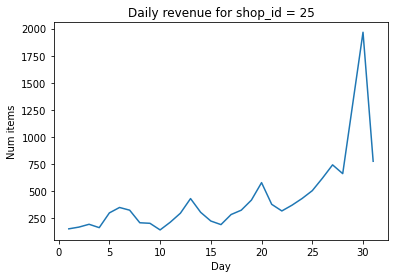

In [79]:
# Write your code here

import matplotlib.pyplot as plt

#create x-Axis without day 29
days = []
date = 0;

for i in total_num_items_sold:
  if date != 28:
    date = date+1 
    days.append(date)
  if date == 28: 
    date = date +1 

plt.plot(days,total_num_items_sold)
plt.xlabel('Day')
plt.ylabel('Num items')
plt.title('Daily revenue for shop_id = 25')

plt.show()

## Final submission
Only for the submission (do not change the code).

In [78]:
print(max_revenue)
print(num_items_constant_price)
print(total_num_items_sold)
print(total_num_items_sold_var)

4756260.749999942
5926
[153.0, 169.0, 195.0, 164.0, 300.0, 350.0, 325.0, 209.0, 204.0, 143.0, 214.0, 297.0, 432.0, 305.0, 225.0, 192.0, 285.0, 325.0, 418.0, 579.0, 379.0, 318.0, 371.0, 433.0, 505.0, 620.0, 743.0, 662.0, 1966.0, 776.0]
117167.70229885059


## Bonus

What item category that generated the highest revenue in spring 2014?</b></li>

* Submit the `id` of the category found.
    
* Here, spring is the period from March to Mai.

In [ ]:
# Write your code here

In [ ]:
#category_id_with_max_revenue = # Save the final value in this variable

In [ ]:
#print(category_id_with_max_revenue)

NameError: ignored